In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set the style of the plots
sns.set_style('whitegrid')
#set matplotlib  to render retina quality images
%config InlineBackend.figure_format = 'retina'



        

In [6]:
#read the data into a dataframe
df = pd.read_csv('/Users/1487846/Downloads/Airline Analysis/flight.csv')

In [7]:
df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [8]:
#get the shape of the data

df.shape

(129780, 12)

In [10]:
#get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [11]:
#changing datatypes from multiple object columns to category
#creating a list of columns with object datatype
obj_cols = df.select_dtypes(include=['object']).columns

#changing the datatype of the columns in the list to category
for col in obj_cols:
    df[col] = df[col].astype('category')



In [14]:
#checking unique values in "hours" column
df['hours'].unique()

array([1, 6, 3, 2, 4, 7, 5, 8], dtype=int64)

In [15]:
#since we have only 8 unique values, we can convert the column to category
df['hours'] = df['hours'].astype('category')

This dataset has been cleaned previously

In [16]:
#checking for missing values
df.isnull().sum()

miles                     0
passengers                0
delay                     0
inflight_meal             0
inflight_entertainment    0
inflight_wifi             0
day_of_week               0
redeye                    0
weekend                   0
coach_price               0
firstclass_price          0
hours                     0
dtype: int64

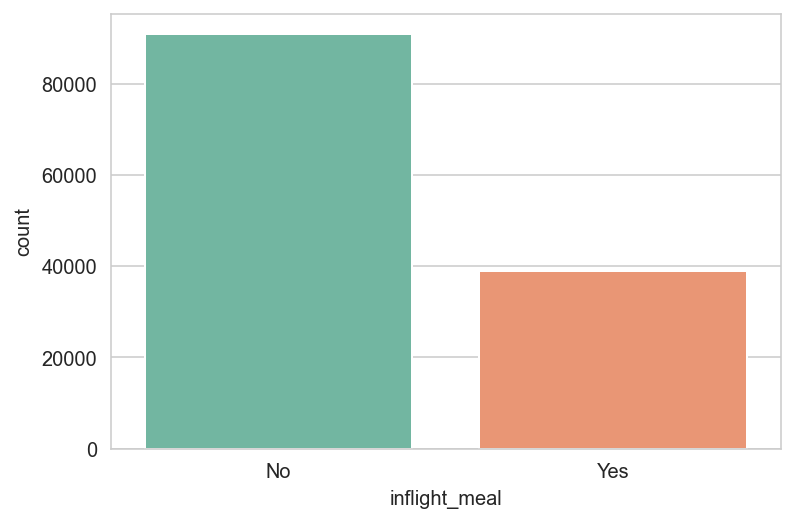

In [21]:
#graphing percentage of flights with inflight_meal
#set the width of the bar

sns.countplot(x='inflight_meal', data=df, palette='Set2');


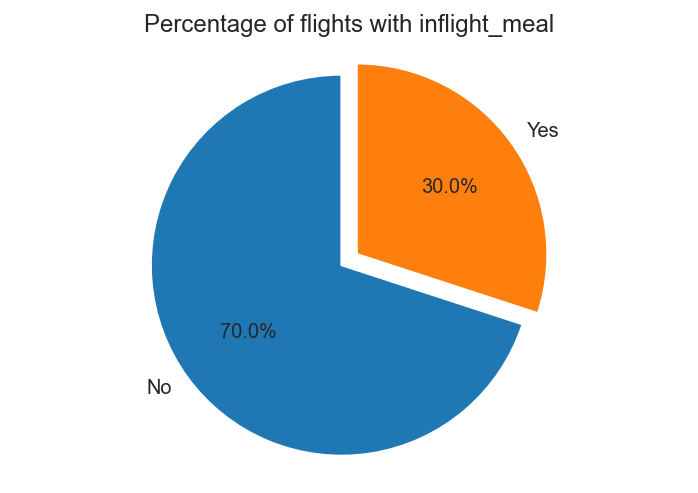

In [26]:
#how many flights had inflight_meal
df['inflight_meal'].value_counts()
#plotting the percentage of flights with inflight_meal vs those without
labels = ['No', 'Yes']
plt.pie(df['inflight_meal'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90,explode=(0,0.1))
plt.axis('equal')
plt.title('Percentage of flights with inflight_meal');


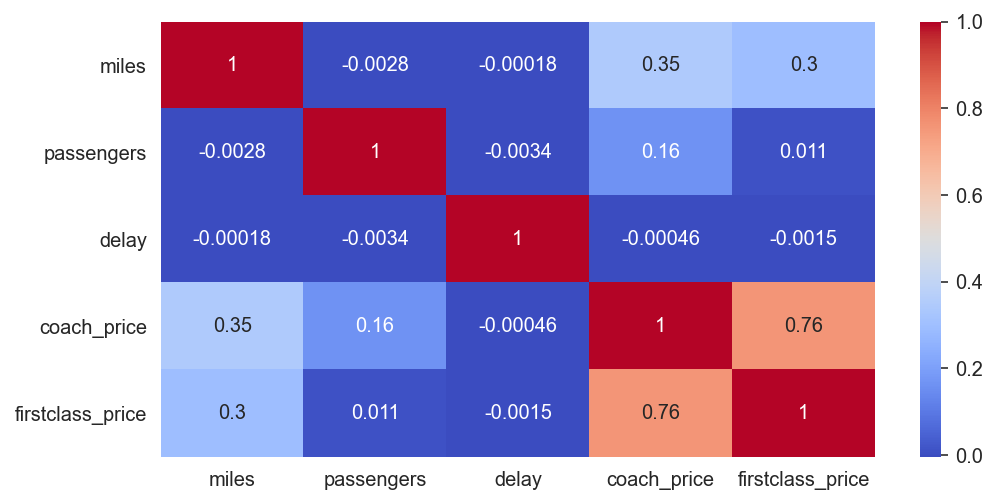

In [28]:
# show correlation beween variables using a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');